<a href="https://colab.research.google.com/github/ddhariwal2911/Android-project/blob/master/face_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#mount google-drive in /content/gdrive
from google.colab import drive 
drive.mount('/content/gdrive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········


TIMEOUT: ignored

In [6]:
cd "/content/gdrive/My Drive/Ind Work/AI crash course/Lecture-slides/Face recognition using Python/Code/"


[Errno 2] No such file or directory: '/content/gdrive/My Drive/Ind Work/AI crash course/Lecture-slides/Face recognition using Python/Code/'
/content


In [7]:
!pwd

/content


In [8]:
!pip install face_recognition
import dlib
import face_recognition

     |████████████████████████████████| 100.2MB 107kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566172 sha256=fe2d5dee6b2bfe6daac53d12bb9d8bddbdc90c1557cab5717084c00fce51dceb
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


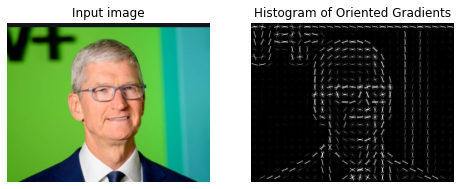

In [10]:
import matplotlib.pyplot as plt
 
from skimage.feature import hog 
from skimage import data, exposure
import cv2
from skimage import io

#read image from disk           ########################### Modify
#image = cv2.imread('tim cook 1.jpeg')
#image = cv2.cvtColor(image, cv2.COLOR_BRGRGB)
image = cv2.imread("tim cook 2.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #use for multi-channel in hog
#image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) #use for single-channel in hog

# fd is the feature-descriptor (used to represent the image)
fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16,16),
                    cells_per_block=(1,1), visualize=True)

#plot Input and hog Image
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

#Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0,10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()





In [11]:
len(fd)

4536

In [12]:
image.shape

(338, 432, 3)

# **Playing with facial landmarks**

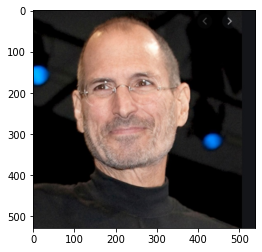

In [24]:
image= cv2.imread("face_demo.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [26]:
face_landmarks_list = face_recognition.face_landmarks(image)

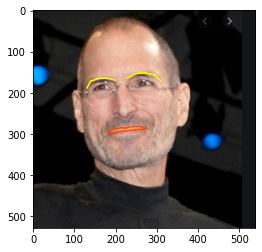

In [27]:
import matplotlib.lines as nlines
from matplotlib.patches import Polygon

plt.imshow(image)
ax = plt.gca()

for face_landmarks in face_landmarks_list:

  left_eyebrow_pts = face_landmarks['left_eyebrow']
  pre_x,pre_y = left_eyebrow_pts[0]
  for (x,y) in left_eyebrow_pts[1:]:

     l = nlines.Line2D([pre_x,x], [pre_y,y],  color="yellow")
     ax.add_line(l)
     pre_x,pre_y = x,y

  right_eyebrow_pts = face_landmarks['right_eyebrow']
  pre_x,pre_y = right_eyebrow_pts[0]
  for (x,y) in right_eyebrow_pts[1:]:
    l= nlines.Line2D([pre_x,x], [pre_y,y], color='yellow')
    ax.add_line(l)
    pre_x,pre_y = x,y

    p=Polygon(face_landmarks['top_lip'], facecolor='lightsalmon', edgecolor='orangered')
    ax.add_patch(p)
    p = Polygon(face_landmarks['bottom_lip'], facecolor='lightsalmon', edgecolor='orangered')
    ax.add_patch

plt.show()    



In [ ]:
import face_recognition

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle 
from matplotlib.patches import Circle
import numpy as np
%matplotlib inline

In [ ]:
# Load the jpg file into a numpy array
# image = face_recognition.load_image_file("tim cook 1.jpeg")
image = cv2.imread('tim cook 2.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [ ]:
# Find all the faces in the image
#face_locations = face_recognition.face_locations(image) ############################################# add your code
face_locations = face_recognition.face_locations(image)

number_of_faces = len(face_locations)
print("Found {} face(s) in input image.".format(number_of_faces))



In [ ]:
# get axis handle
plt.imshow(image)
ax = plt.gca()

# repeat for all faces found
for face_location in face_locations:
   
   # Print the location of each face in this image.Each face is a list of co-ordinates in (top, right, bottom,left) order.
   top, right, bottom,left = face_location
   x,y,w,h = left, top, right, bottom
   print("A face is located at pixel location Top: {}, Left: {}, Bottom: {}, Right: {}".format(x,y,w,h))
   # Let's draw a box around the face
   rect = Rectangle((x,y), w-x, h-y, fill=False, color='red')
   ax.add_patch(rect)

# show output image
plt.show()   

# **Face recognition**

In [ ]:
import face_recognition

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
import numpy as np
import cv2
%matplotlib inline


In [ ]:
#Load the known images (create a database)
#face_demo = face_recognition.load_image_file("person_1'jpg")
image = cv2.imread('face_demo.png')
face_demo = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

# tim cook1 = face_recognition.load_image_file("person_2.jpg")
image = cv2.imread('tim cook 1.jpg')
tim cook1 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# tim cook 2 = face_recognition.load_image_file("person_3.jpg")
image = cv2.imread("tim cook 3.jpeg")
tim cook 2 =cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [28]:
#get the  face encoding of each person. this can fall if no one is found in the photo.
# face_demo_encoding = face_recognition.face_encodings(face_demo)[0]
# tim cook1_encoding = face_recognition.face_encodings(tim cook1)[0]
# tim cook 2_encoding = face_recognition.face_encodings(tim cook 2)[0]

##################################################### add your code
face_demo_encoding = face_recognition.face_encodings(face_demo)[0]
tim cook1_encoding = face_recognition.face_encodings(tim cook1)[0]
tim cook 2_encoding = face_recognition.face_encodings(tim cook 2)[0]

#create a database of all known face encodings
known_face_encodings= {
    face_demo_encoding 
    tim cook1_encoding 
    tim cook 2_encoding
}
    
    








SyntaxError: ignored

In [ ]:
# load the image we want to check
# unknown_image = face_recognition.load_image("unknown_8.jpg")
image = cv2.imread('tim cook.jpg')
unknown_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(unknown_image)

#get face encodings for any people in the picture
# unknown_face_recognition = face_recognition.face_encodings(unknown_image) ################################## add your code
unknown_face_encodings = face_recogition.face_encodingd(unknown_image)
encodings = face_recognition.face_encodings(known_image)
if len(encodings) > 0:
    biden_encoding = encodings[0]
else:
   print("No faces found in the image!")
   quit()

In [31]:
from scipy.spatial import distance

# There might be more than one person in the photo,so we need to loop over face we found
for unknown_face_encoding in unknown_face_encodings:
  encodings = face_recognition.face_encodings(known_image)
if len(encodings) > 0:
    biden_encoding = encodings[0]
else:
   print("No faces found in the image!")
   quit() 

  #test if this unknown face encoding matches any of the three people we know
  #results = face_recognition.compare_faces(known_face_encodings, unknown_face_encoding, tolerance=0.6)

  #compute euclidean distance (alternatively,use above code for one-line)
   results=[]
   for known_face_encoding in known_face_encodings:
    d= distance.euclidean(known_face_encoding, unknown_face_encoding)
    #print("Euclidean distance: ",d)
    results.append(d)
    threshold=0.6 
    results = np.array(results) <= threshold

    name = "unknown"

    if results[0]:
      name = "Face demo image"
    elif results[1]:
      name = "tim cook"
    elif results[2]:
      name = "steve jobs"
    print(f"found {name} in the proto!")    

NameError: ignored